In [25]:
# required larch modules
# calculate pre-edge and post edge for normalisation
from larch.xafs import pre_edge
# perform background removal
from larch.xafs import autobk
# calculate fourier transform
from larch.xafs import xftf
# managing athena files
from larch.io import create_athena, read_athena, extract_athenagroup
# reading data from ascii file
from larch.io import read_ascii
# linear combination fitting
from larch.math import lincombo_fit

# additional libraries
from numpy import log
%matplotlib inline
import matplotlib.pyplot as plt

 #######################################################
# |         Athena recalculates everything so we      | #
# |      need to create a function that calculates    | #
# V               all for each new group              V #
 #######################################################

def calc_with_defaults(xafs_group):
    # calculate mu and normalise with background extraction
    # should let the user specify the colums for i0, it, mu, iR. 
    if not hasattr(xafs_group, 'mu'):
        xafs_group = get_mu(xafs_group)    
    # calculate pre-edge and post edge and add them to group
    pre_edge(xafs_group)
    # perform background removal
    autobk(xafs_group) # using defaults so no additional parameters are passed
    # calculate fourier transform
    xftf(xafs_group, kweight=0.5, kmin=3.0, kmax=12.871, dk=1, kwindow='Hanning')
    return xafs_group

 #######################################################
# |       The code for plotting Nmu vs E repeats      | #
# |   so it is useful to have a plotting function     | #
# V            to reduce duplicated code              V #
 #######################################################
# plot mu vs flat normalised mu for selected groups
def plot_NxmuE_E_athena_prj(athena_project, group_keys, group_names,
                            title = "Normalised Mu vs E", xlimits = None,
                            ylimits = None):    
    # plot mu vs flat normalised mu for selected groups
    for group_key in group_keys:
        gr_0 = extract_athenagroup(athena_project._athena_groups[group_key])
        # recalculate normalisation
        calc_with_defaults(gr_0)
        plt.plot(gr_0.energy, gr_0.flat, label=group_names[group_key])
    # set plot format
    plt.xlabel("Energy")
    plt.ylabel("normalised xmuE" )
    plt.title(title)
    plt.grid(linestyle=':', linewidth=1) #show and format grid
    if xlimits != None:
        plt.xlim(xlimits[0],xlimits[1])
    if ylimits != None:
        plt.ylim(ylimits[0],ylimits[1])
    plt.legend()
    return plt


In [26]:
project_file = '37123_Rh4CO_Marks/37123_rh.prj'
rh4co_project = read_athena(project_file)

In [27]:
vars(rh4co_project)

{'__name__': '0x996d30',
 '__doc__': 'XAFS Data from Athena Project File 37123_Rh4CO_Marks/37123_rh.prj',
 '_athena_journal': '',
 '_athena_header': '# Athena project file -- Demeter version 0.9.24\n# This file created at 2020-06-21T14:59:43\n# Using Larch version 0.9.47, Python 3.6.10 on Windows-10-10.0.18362-SP0\n',
 '_athena_groups': OrderedDict([('d_37123_Rh_4_CO_00000_dat',
               <Group 0x9a45d0>),
              ('d_37123_Rh_4_CO_00500_dat', <Group 0x9a4650>),
              ('d_37123_Rh_4_CO_01000_dat', <Group 0x9a46d0>),
              ('d_37123_Rh_4_CO_01500_dat', <Group 0x9a4770>),
              ('d_37123_Rh_4_CO_02000_dat', <Group 0x9a47f0>),
              ('d_37123_Rh_4_CO_02500_dat', <Group 0x9a4890>),
              ('d_37123_Rh_4_CO_03000_dat', <Group 0x9a4910>),
              ('d_37123_Rh_4_CO_03500_dat', <Group 0x9a4990>),
              ('d_37123_Rh_4_CO_03999_dat', <Group 0x9a4a10>),
              ('bnmwo', <Group 0x9a4a70>)]),
 'd_37123_Rh_4_CO_00000_dat': <Grou

In [53]:
# get the group keys for first 8 groups
group_keys = list(rh4co_project._athena_groups.keys())[0:9]
# set group names
group_names = {'d_37123_Rh_4_CO_00000_dat':"ref_1",
               'd_37123_Rh_4_CO_00500_dat':"ref_2",
               'd_37123_Rh_4_CO_01000_dat':"ref_3",
               'd_37123_Rh_4_CO_01500_dat':"ref_4",
               'd_37123_Rh_4_CO_02000_dat':"ref_5",
               'd_37123_Rh_4_CO_02500_dat':"ref_6",
               'd_37123_Rh_4_CO_03000_dat':"ref_7",
               'd_37123_Rh_4_CO_03500_dat':"ref_8",
               'd_37123_Rh_4_CO_03999_dat':"ref_9",
               'bnmwo':"merge"}

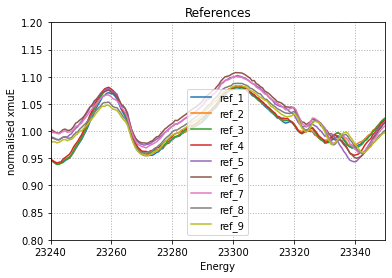

In [60]:
plt = plot_NxmuE_E_athena_prj(rh4co_project, group_keys, group_names,
                              title = "References",xlimits = [23240,23350],ylimits = [0.8,1.2])

In [37]:
group_keys

['d_37123_Rh_4_CO_00000_dat',
 'd_37123_Rh_4_CO_00500_dat',
 'd_37123_Rh_4_CO_01000_dat',
 'd_37123_Rh_4_CO_01500_dat',
 'd_37123_Rh_4_CO_02000_dat',
 'd_37123_Rh_4_CO_02500_dat',
 'd_37123_Rh_4_CO_03000_dat',
 'd_37123_Rh_4_CO_03500_dat',
 'd_37123_Rh_4_CO_03999_dat',
 'bnmwo']